In [2]:
import numpy
import pandas as pd
from sklearn import preprocessing
numpy.random.seed(10)
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout,Activation, Flatten, Conv2D, MaxPooling2D, ZeroPadding2D

Using TensorFlow backend.


In [3]:
all_df = pd.read_excel("data/titanic3.xls")

In [4]:
cols = ["survived", "name", "pclass", "sex", "age", "sibsp", "parch", "fare", "embarked"]
all_df = all_df[cols]

In [5]:
msk = numpy.random.rand(len(all_df)) < 0.8
train_df = all_df[msk]
test_df = all_df[~msk]

In [6]:
print("total:", len(all_df),
     "trein:", len(train_df),
     "test:", len(test_df))

total: 1309 trein: 1034 test: 275


In [7]:
def PreprocessData(raw_df):
    df = raw_df.drop(["name"], axis = 1)
    age_mean = df["age"].mean()
    df["age"] = df["age"].fillna(age_mean)
    fare_mean = df["fare"].mean()
    df["fare"] = df["fare"].fillna(age_mean)
    df["sex"] = df["sex"].map({"female":0, "male":0}).astype(int)
    x_OneHot_df = pd.get_dummies(data = df, columns = ["embarked"])
    
    ndarray = x_OneHot_df.values
    Features = ndarray[:,1:]
    Label = ndarray[:,0]
    
    minmax_scale = preprocessing.MinMaxScaler(feature_range = (0, 1))
    scaledFeatures = minmax_scale.fit_transform(Features)
    
    return scaledFeatures, Label

In [8]:
train_Features, train_Label = PreprocessData(train_df)
test_Features, test_Label = PreprocessData(test_df)

In [9]:
model = Sequential()

In [10]:
model.add(Dense(units = 40,
               input_dim = 9,
               kernel_initializer = "uniform",
               activation = "relu"))

Instructions for updating:
Colocations handled automatically by placer.


In [11]:
model.add(Dense(units = 30,
               kernel_initializer = "uniform",
               activation = "relu"))

In [12]:
model.add(Dense(units = 1,
               kernel_initializer = "uniform",
               activation = "sigmoid"))

In [13]:
model.compile(loss = "binary_crossentropy", optimizer = "adam", 
             metrics = ["accuracy"])

In [14]:
train_history = model.fit(x = train_Features,
                         y = train_Label, validation_split = 0.1,
                         epochs = 30, batch_size = 30, verbose = 2)

Instructions for updating:
Use tf.cast instead.
Train on 930 samples, validate on 104 samples
Epoch 1/30
 - 0s - loss: 0.6906 - acc: 0.5849 - val_loss: 0.6734 - val_acc: 0.7885
Epoch 2/30
 - 0s - loss: 0.6777 - acc: 0.5871 - val_loss: 0.6158 - val_acc: 0.7885
Epoch 3/30
 - 0s - loss: 0.6539 - acc: 0.6032 - val_loss: 0.5511 - val_acc: 0.7885
Epoch 4/30
 - 0s - loss: 0.6357 - acc: 0.6441 - val_loss: 0.5407 - val_acc: 0.7885
Epoch 5/30
 - 0s - loss: 0.6228 - acc: 0.6591 - val_loss: 0.5356 - val_acc: 0.8173
Epoch 6/30
 - 0s - loss: 0.6133 - acc: 0.6785 - val_loss: 0.5268 - val_acc: 0.7885
Epoch 7/30
 - 0s - loss: 0.6069 - acc: 0.6796 - val_loss: 0.5351 - val_acc: 0.8173
Epoch 8/30
 - 0s - loss: 0.6027 - acc: 0.6892 - val_loss: 0.5192 - val_acc: 0.7788
Epoch 9/30
 - 0s - loss: 0.6020 - acc: 0.6903 - val_loss: 0.5229 - val_acc: 0.7885
Epoch 10/30
 - 0s - loss: 0.5991 - acc: 0.6925 - val_loss: 0.5242 - val_acc: 0.8077
Epoch 11/30
 - 0s - loss: 0.5951 - acc: 0.6968 - val_loss: 0.5191 - val_acc

In [15]:
import matplotlib.pyplot as plt
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title("Train History")
    plt.ylabel(train)
    plt.xlabel("Epoch")
    plt.legend(["train", "validation"], loc = "upper left")
    plt.show()

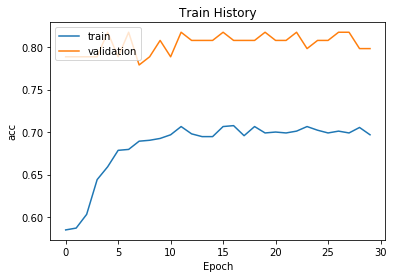

In [16]:
show_train_history(train_history, "acc", "val_acc")

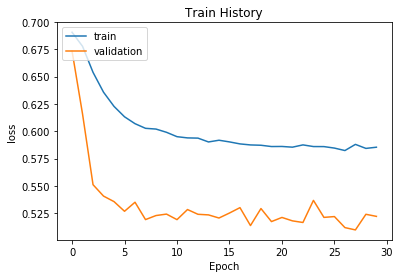

In [17]:
show_train_history(train_history, "loss", "val_loss")

In [18]:
scores = model.evaluate(x = test_Features,y = test_Label)

275/275 [==============================] - 0s 22us/step


In [19]:
scores[1]

0.7018181822516701

In [20]:
Jack = pd.Series([0, "Jack", 3, "male", 23, 1, 0, 5.0000, "S"])
Rose = pd.Series([1, "Rose", 1, "female", 20, 1, 0, 100.0000, "S"])

In [21]:
JR_df = pd.DataFrame([list(Jack), list(Rose)], 
                     columns = ["survived", "name", "pclass", "sex", "age", "sibsp", "parch", "fare", "embarked"])

In [22]:
all_df = pd.concat([all_df, JR_df])

In [23]:
all_df[-2:]

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked
0,0,Jack,3,male,23.0,1,0,5.0,S
1,1,Rose,1,female,20.0,1,0,100.0,S


In [24]:
all_Features, Label = PreprocessData(all_df)

In [26]:
all_probability = model.predict(all_Features)

In [27]:
all_probability[:10]

array([[0.75904393],
       [0.82466847],
       [0.82352304],
       [0.7900237 ],
       [0.79650784],
       [0.4561247 ],
       [0.3923593 ],
       [0.4937011 ],
       [0.4236968 ],
       [0.50140184]], dtype=float32)

In [29]:
pd = all_df
pd.insert(len(all_df.columns), "probability", all_probability)

In [30]:
pd[-2:]

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked,probability
0,0,Jack,3,male,23.0,1,0,5.0,S,0.229575
1,1,Rose,1,female,20.0,1,0,100.0,S,0.731316


In [32]:
pd[(pd["survived"] == 0) & (pd["probability"]> 0.7)]

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked,probability
2,0,"Allison, Miss. Helen Loraine",1,female,2.0,1,2,151.5500,S,0.823523
3,0,"Allison, Mr. Hudson Joshua Creighton",1,male,30.0,1,2,151.5500,S,0.790024
4,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,female,25.0,1,2,151.5500,S,0.796508
10,0,"Astor, Col. John Jacob",1,male,47.0,1,0,227.5250,C,0.770615
16,0,"Baxter, Mr. Quigg Edmond",1,male,24.0,0,1,247.5208,C,0.839542
19,0,"Beattie, Mr. Thomson",1,male,36.0,0,0,75.2417,C,0.723882
25,0,"Birnbaum, Mr. Jakob",1,male,25.0,0,0,26.0000,C,0.725590
40,0,"Brewe, Dr. Arthur Jackson",1,male,NaN,0,0,39.6000,C,0.720990
53,0,"Carrau, Mr. Jose Pedro",1,male,17.0,0,0,47.1000,S,0.710103
71,0,"Clark, Mr. Walter Miller",1,male,27.0,1,0,136.7792,C,0.771803


In [33]:
pd[:5]

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked,probability
0,1,"Allen, Miss. Elisabeth Walton",1,female,29.0000,0,0,211.3375,S,0.759044
1,1,"Allison, Master. Hudson Trevor",1,male,0.9167,1,2,151.5500,S,0.824668
2,0,"Allison, Miss. Helen Loraine",1,female,2.0000,1,2,151.5500,S,0.823523
3,0,"Allison, Mr. Hudson Joshua Creighton",1,male,30.0000,1,2,151.5500,S,0.790024
4,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,female,25.0000,1,2,151.5500,S,0.796508
